In [1]:
import random

from intro.timing import compare

In [27]:
def test(gcd, n_iter=100):
    for _ in range(n_iter):
        c = random.randint(0, 1024)
        a = c * random.randint(0, 128)
        b = c * random.randint(0, 128)
        assert gcd(a, a) == gcd(a, 0) == a
        assert gcd(b, b) == gcd(b, 0) == b
        assert gcd(a, 1) == 1
        assert gcd(b, 1) == 1
        d = gcd(a, b)
        assert a%d == b%d == 0

In [28]:
def gcd1(a, b):
    assert a >= 0 and b >= 0
    for d in reversed(range(max(a, b) + 1)):
        if d==0 or a%d == b%d == 0:
            return d

In [29]:
gcd1(8, 3)

1

In [30]:
gcd1(8, 0)

8

In [31]:
gcd1(0, 0)

0

In [32]:
test(gcd1)

In [33]:
def gcd2(a, b):
    while a and b:
        if a >= b:
            a %= b
        else:
            b %= a
    return max(a, b)

In [34]:
test(gcd2)

In [35]:
gcd2(10000000000, 10000000000)

10000000000

In [2]:
def gcd3(*args):
    assert len(args) == 2
    a, b = args
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    elif a >= b:
        return gcd3(a%b, b)
    else:
        return gcd3(a, b%a)

In [37]:
test(gcd3)

In [7]:
def gcd4(*args):
    assert len(args) == 2
    a, b = args
    assert a >= 0 and b >= 0
    if a == 0 or b == 0:
        return max(a, b)
    return gcd4(b%a, a)

In [39]:
test(gcd4)

In [4]:
args1 = [(random.randint(10**6, 9*10**6), random.randint(10**8, 9*10**8)) for i in range(300)]

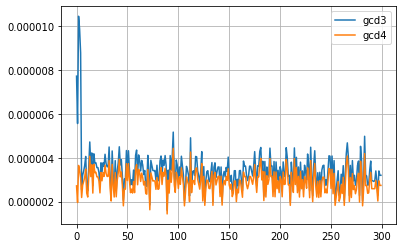

In [6]:
compare([gcd3, gcd4], args1)